In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("//content//drive//MyDrive//inceptionv3.h5")
for layer in model.layers:
    layer.trainable = False

# Remove the last layer using layers.pop
model.layers.pop()
model.layers.pop()
# Display model summary to ensure it's loaded correctly
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94[0

In [5]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("//content//drive//MyDrive//inceptionv3.h5")

# Get the second-last layer
second_last_layer = model.layers[-2]

# Create a new model with the layers up to the second-last layer
new_model = tf.keras.Model(inputs=model.input, outputs=second_last_layer.output)

# Display model summary to ensure it's loaded correctly
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94[0

In [6]:
!git clone https://github.com/ari-dasci/OD-WeaponDetection.git

Cloning into 'OD-WeaponDetection'...
remote: Enumerating objects: 50755, done.
remote: Counting objects: 100% (11673/11673), done.
remote: Compressing objects: 100% (10232/10232), done.
remote: Total 50755 (delta 11), reused 11673 (delta 11), pack-reused 39082
Receiving objects: 100% (50755/50755), 2.26 GiB | 40.41 MiB/s, done.
Resolving deltas: 100% (10978/10978), done.
Updating files: 100% (63128/63128), done.


In [7]:
%cd /content
%mkdir dataset
%cd dataset
%mkdir knife
%mkdir guns
%cp -r "/content/OD-WeaponDetection/Knife_detection/Images/." knife
%cp -r "/content/OD-WeaponDetection/Pistol detection/Weapons/." guns
%cp -r "/content/OD-WeaponDetection/Weapons and similar handled objects/Sohas_weapon-Detection/images/." handheld

/content
/content/dataset


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the directory containing your dataset
dataset_dir = '/content/dataset'

# Get the list of subdirectories (classes) in the dataset directory
classes = [class_name for class_name in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_name)) and class_name != ".git"]

# Define the dimensions for resizing the images
img_height, img_width = 224, 224

# Define batch size for training and validation
batch_size = 32

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

# Create train and validation data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=classes
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=classes
)

# Print the number of classes and their labels
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

class_labels = train_generator.class_indices
print("Class labels:", class_labels)

Found 8569 images belonging to 3 classes.
Found 1511 images belonging to 3 classes.
Number of classes: 3
Class labels: {'knife': 0, 'guns': 1, 'handheld': 2}


In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model

# Load InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False)

# Plot the model architecture
plot_model(inception_model, to_file='inception_model.png', show_shapes=True, show_layer_names=True)


87910968/87910968 [==============================] - 0s 0us/step


In [20]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model

# Load InceptionV3 model
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False)

# Plot the model architecture
plot_model(inceptionv3_model, to_file='inceptionv3_model.png', show_shapes=True, show_layer_names=True)

# Extract features using the pre-trained model
features = inceptionv3_model.predict(train_generator, verbose=1)

# Reshape features to have one feature vector per image
features = features.reshape((features.shape[0], -1))

# Check the shape of the reshaped features
print("Shape of features after reshaping:", features.shape)

# Now you can proceed to use these features with a Dense layer or any other further processing


268/268 [==============================] - 176s 651ms/step
Shape of features after reshaping: (8569, 51200)


In [30]:
import numpy as np

# Assuming you've already extracted features using the InceptionV3 model for validation data
# Extract features using the pre-trained model for validation data
val_features = inceptionv3_model.predict(validation_generator, verbose=1)

# Reshape validation features to have one feature vector per image
val_features = val_features.reshape((val_features.shape[0], -1))

# Step 1: Compute the mean of each feature
val_means = np.mean(val_features, axis=0)

# Step 2: Compute the standard deviation of each feature
val_stds = np.std(val_features, axis=0)

# Step 3: Normalize the features
val_normalized_features = (val_features - val_means) / val_stds

# Get the corresponding labels for validation data
val_labels = validation_generator.classes



48/48 [==============================] - 39s 812ms/step


In [31]:
from sklearn.decomposition import PCA

# Assuming you have extracted features using InceptionV3 and stored them in normalized_features
# Replace normalized_features with your InceptionV3 extracted features

# Determine the number of features in your InceptionV3 extracted features
num_features = normalized_features.shape[1]

# Choose the number of components for PCA
dims = min(16, num_features)  # Choose the minimum between 16 and the number of features

# Apply PCA on InceptionV3 extracted features
pca = PCA(n_components=dims)
pca.fit(normalized_features)
pca_features = pca.transform(normalized_features)

# Assuming you have validation features extracted using InceptionV3 and stored them in val_normalized_features
# Replace val_normalized_features with your validation InceptionV3 extracted features

# Apply PCA on validation features
val_pca = PCA(n_components=dims)
val_pca.fit(val_normalized_features)
val_pca_features = val_pca.transform(val_normalized_features)


In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
num_clusters = 3 # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pca_features)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


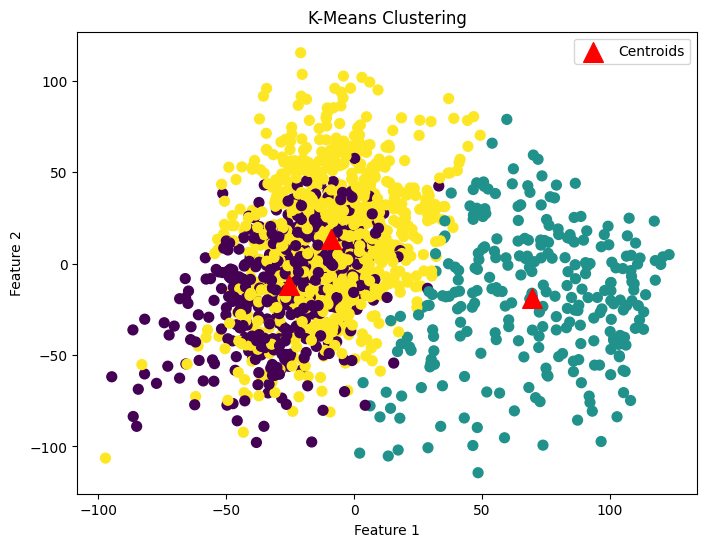

Silhouette Score: 0.13255876
Davies-Bouldin Index: 2.4574315873153516


In [33]:
# Fit KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(val_pca_features)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(val_pca_features[:, 0], val_pca_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s=200, c='red', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Calculate silhouette score and Davies-Bouldin index
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(val_pca_features, y_kmeans)
db_index = davies_bouldin_score(val_pca_features, y_kmeans)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)

In [34]:
print("Shape of pca_features:", pca_features.shape)
print("Sample data from pca_features:")
print(pca_features[:5])  # Print the first 5 rows of pca_features


Shape of pca_features: (8569, 16)
Sample data from pca_features:
[[ 48.807358    69.485504   -51.276894    37.796535   -11.549037
   21.086115    54.342567     8.252361     5.3896356   30.009703
   29.415833   -22.62446     -7.3923936  -10.464766    12.22127
    8.4699745 ]
 [ 66.46295     38.206985    30.623957    15.892577     0.91045475
  -19.76276     -0.6379877  -21.850134   -32.2994     -11.966963
   29.014292    23.719751     3.9480364  -29.754229   -20.86664
   26.468197  ]
 [  4.469244    30.802252   -30.043903     8.387379    21.656986
    2.5272925  -13.834699   -18.929287   -10.853539     8.691614
   14.547923   -14.787155     1.3973691   -2.6336646   -9.103854
    4.938058  ]
 [-92.35137     -7.454887    48.29682     19.477512    -8.652031
   22.364088    -0.1516802   10.824509   -10.602484    -9.752876
    5.46951     13.832839    14.402561   -12.3360615   -1.7608458
   -2.8255296 ]
 [ 55.968864    60.4929       2.9256594   60.82186      7.299352
   -7.0695176    9.570797

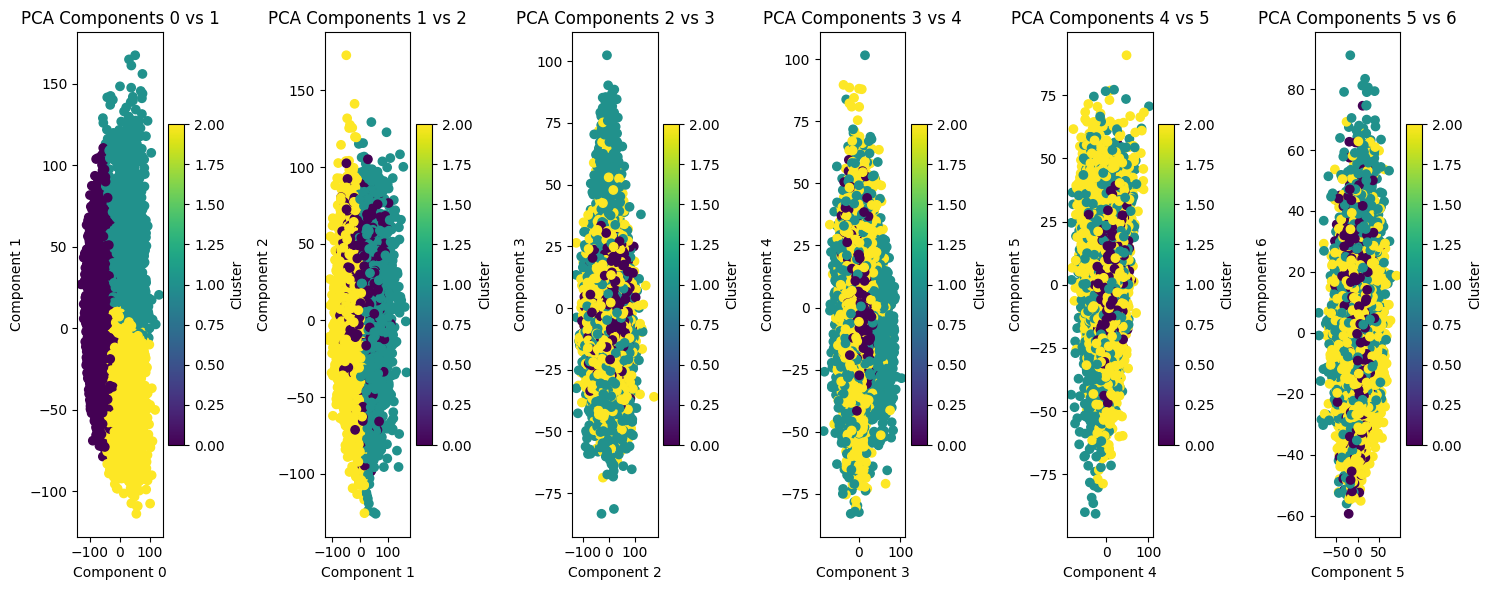

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for i in range(6):  # Adjusted for 6 components
    plt.subplot(1, 6, i+1)  # Adjusted for 6 components
    plt.scatter(pca_features[:, i], pca_features[:, i+1], c=cluster_labels, cmap='viridis')
    plt.title(f'PCA Components {i} vs {i+1}')
    plt.xlabel(f'Component {i}')
    plt.ylabel(f'Component {i+1}')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [41]:
print("Shape of pca_features:", pca_features.shape)

Shape of pca_features: (8569, 16)


In [46]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42)

# Define the multilayer perceptron model
mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(dims,)),  # Adjusted for the number of PCA components
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp.fit(X_train, y_train, epochs=2, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = mlp.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/2
857/857 [==============================] - 9s 6ms/step - loss: -14874.3535 - accuracy: 0.4818 - val_loss: -60878.1289 - val_accuracy: 0.5012
Epoch 2/2
54/54 [==============================] - 0s 4ms/step - loss: -464894.1250 - accuracy: 0.5268
Test Accuracy: 0.5268378257751465


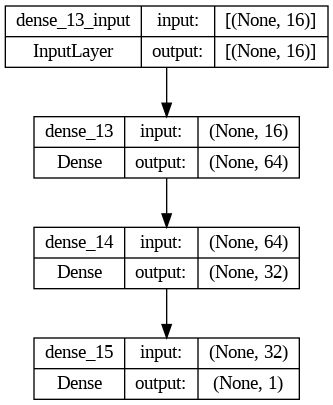

In [47]:
plot_model(mlp, show_shapes=True, show_layer_names=True)

In [ ]:
# decision boundry not cmng


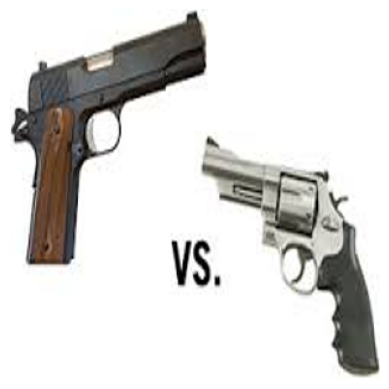

1/1 [==============================] - 3s 3s/step


In [54]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "/content/dataset/guns/armas (1).jpg"  # Replace with the path to your image file
image = Image.open(image_path)

# Resize the image to 299x299
resized_image = image.resize((299, 299))

# Convert the PIL image to a NumPy array
image_array = np.array(resized_image)

# Plot the image using Matplotlib
plt.imshow(image_array)
plt.axis('off')  # Turn off axis
plt.show()

# Assuming `model` is your InceptionV3 model
embedding = model.predict(image_array[np.newaxis, ...], verbose=1)

#print(embedding)


In [55]:
# Step 1: Compute the mean of each feature
means_ = np.mean(embedding, axis=0)

# Step 2: Compute the standard deviation of each feature
stds_ = np.std(embedding, axis=0)

#embedding[np.isnan(embedding)] = 0
# Step 3: Normalize the features
normalized_embedding = (embedding - means_) / stds_
normalized_embedding[np.isnan(normalized_embedding)] = 0

<ipython-input-55-c862e3a99682>:9: RuntimeWarning: invalid value encountered in divide
  normalized_embedding = (embedding - means_) / stds_


In [59]:
# Ensure that the input data has more samples than features
if normalized_embedding.shape[0] < normalized_embedding.shape[1]:
    # Transpose the input data if the number of samples is less than the number of features
    normalized_embedding = normalized_embedding.T

# Determine the number of features in your InceptionV3 extracted features
num_features = normalized_embedding.shape[1]

# Choose the number of components for PCA
dims = min(3, num_features)  # Adjust the number of components as needed

# Apply PCA on InceptionV3 extracted features
pca = PCA(n_components=dims)
pca.fit(normalized_embedding)
pca_embeddings = pca.transform(normalized_embedding)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(pca_embeddings)
cluster = kmeans.predict(pca_embeddings)

# Print cluster labels
print("Cluster Labels:", cluster)




Cluster Labels: [0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-78c71f6d5495>:19: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pca_embeddings)
